# **Data Visualisation**

## Objectives

* Create visual representations of the cleaned asthma dataset to make patterns easier to understand
* Compare numeric and categorical variables visually
* Highlight relationships between features and asthma diagnosis

## Inputs

* Cleaned dataset saved at dataset/processed/asthma_cleaned.csv
* Python libraries: pandas, matplotlib, seaborn

## Outputs

* Histograms, boxplots, and scatter plots for numeric variables
* Count plots for categorical variables like Gender and Smoking
* Heatmap showing correlations between numeric variables



---

# Section 1

The below focuses on analysis of the cleaned dataset. First, the data is loaded (using pandas) from the processed CSV and inspected, providing an overview of the data and helps identify which variables to focus on.

Matplotlib is then used to create histograms for numeric values ranging from 1-10 to visualise their distributions.

Seaborn is used to generate boxplots, comparing numeric variables across BMI categories, countplots to show frequencies of categorical variables like gender and smoking status, a heatmap to visualise correlations between numeric features (using pandas to select numeric columns and calculate correlations), and a scatter plot to inspect the relationship between BMI and lung function. 

These analyses will help identify trends, potential risk factors and relationships for future statistical testing.


   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   63       0          1               0  15.848744        0   
1   26       1          2               2  22.757042        0   
2   57       0          2               1  18.395396        0   
3   40       1          2               1  38.515278        0   
4   61       0          0               3  19.283802        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0          0.894448     5.488696      8.701003           7.388481  ...   
1          5.897329     6.341014      5.153966           1.969838  ...   
2          6.739367     9.196237      6.840647           1.460593  ...   
3          1.404503     5.826532      4.253036           0.581905  ...   
4          4.604493     3.127048      9.625799           0.980875  ...   

   LungFunctionFEV1  LungFunctionFVC  Wheezing  ShortnessOfBreath  \
0          1.369051         4.941206         0                  0   
1          2.197767       

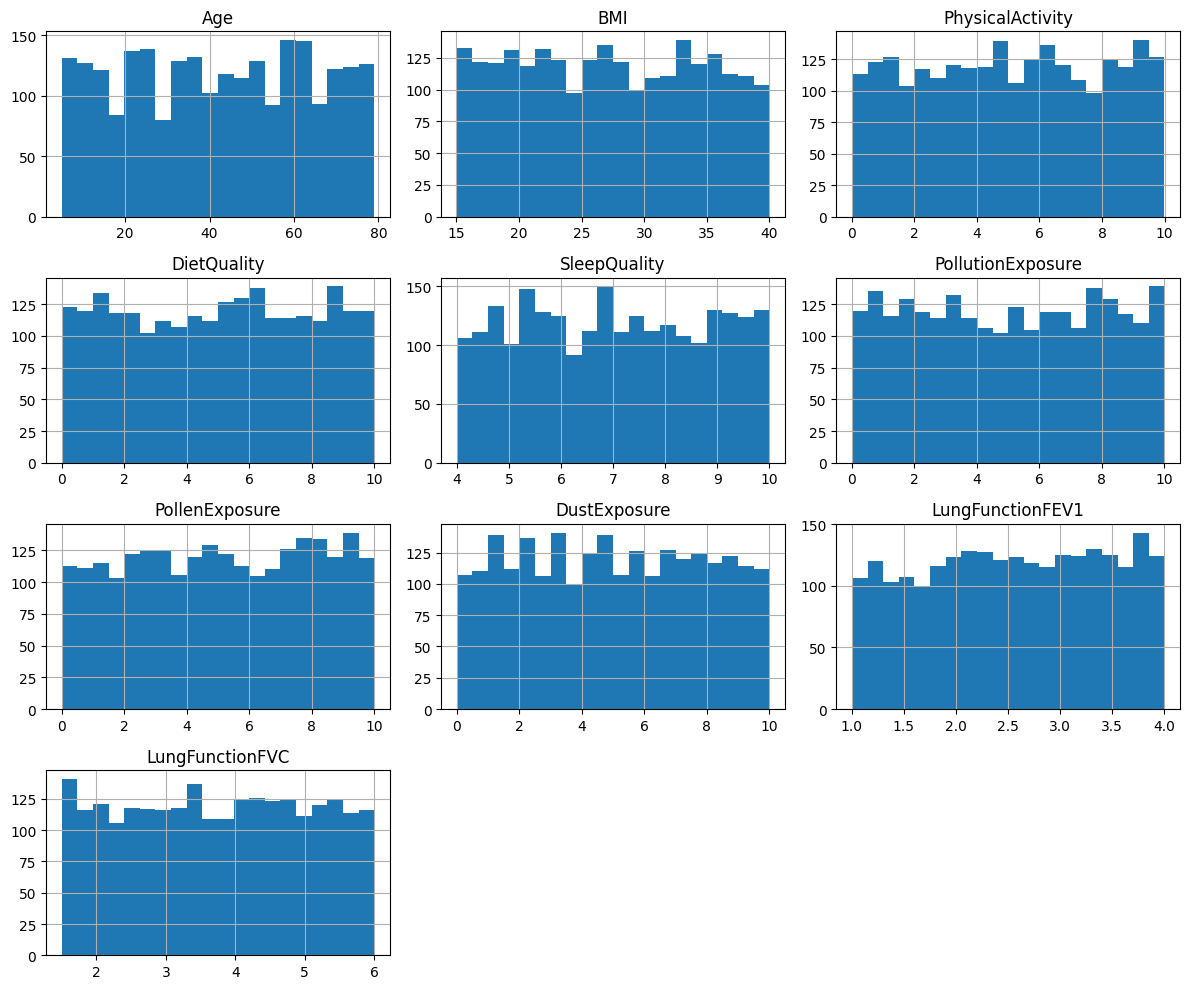

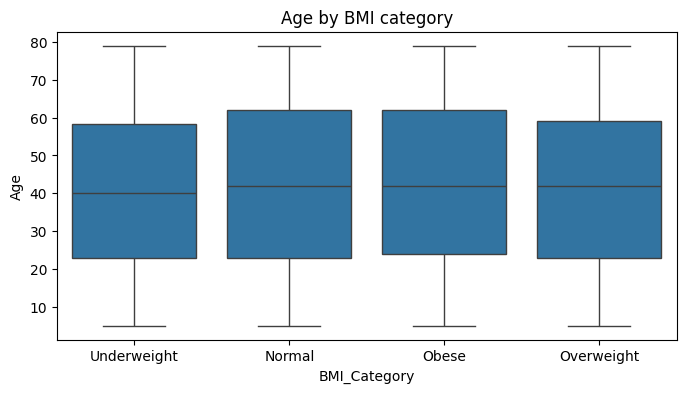

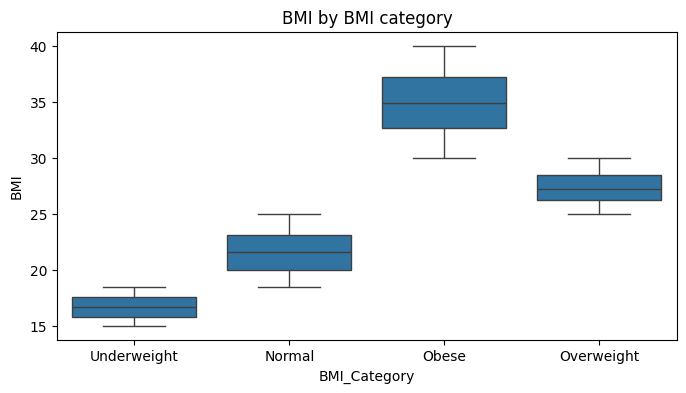

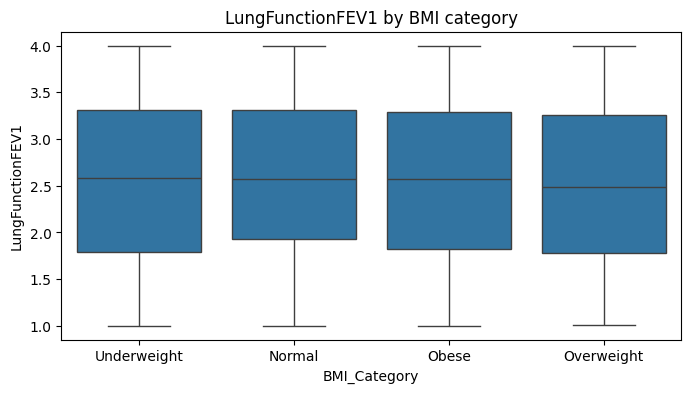

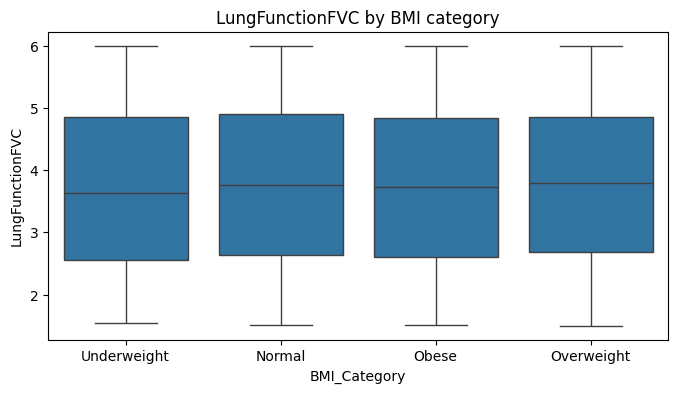

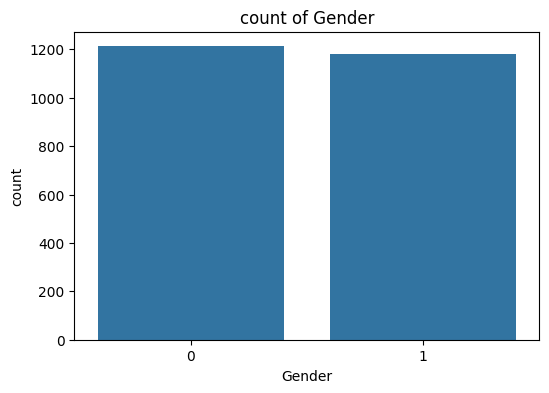

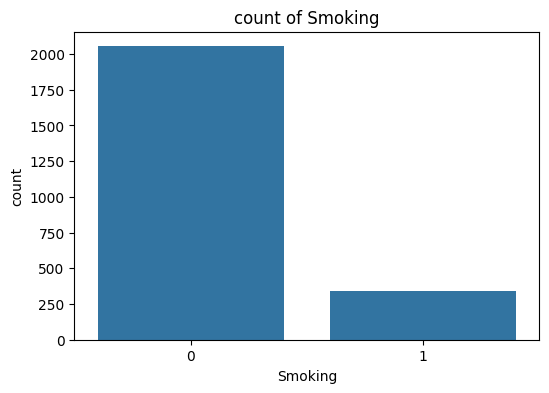

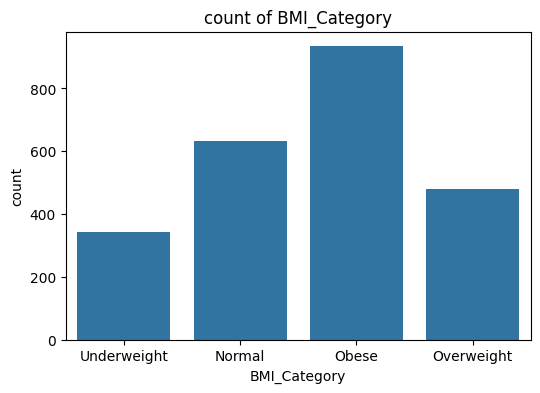

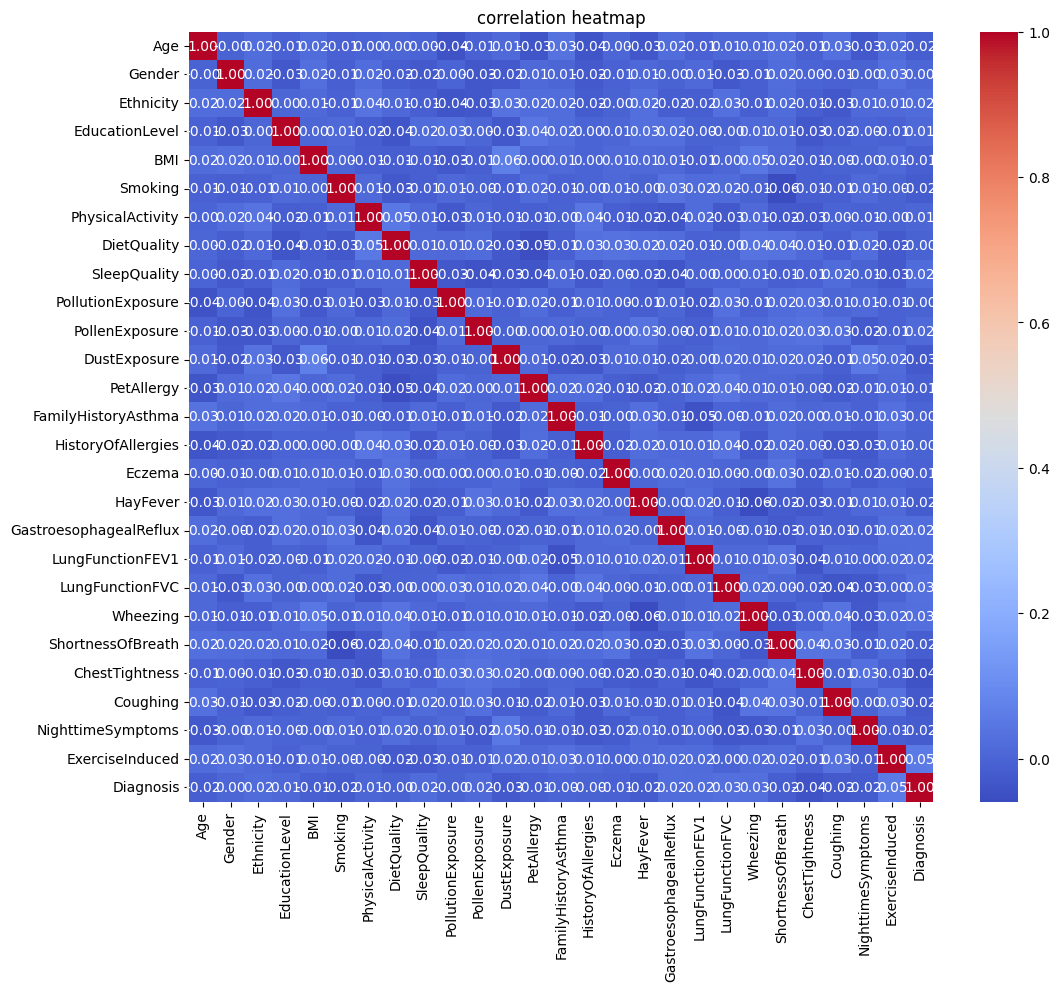

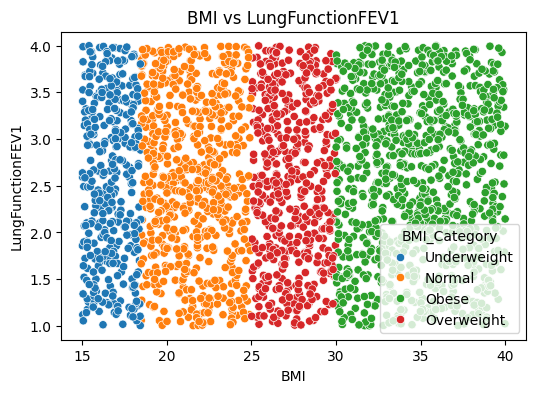

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loads cleaned data
processed_path = 'dataset/processed/asthma_cleaned.csv'
df = pd.read_csv(processed_path)

# section 1 stuff
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# matplotlib - histograms for numerics out of 10
numeric_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                'PollutionExposure', 'PollenExposure', 'DustExposure', 
                'LungFunctionFEV1', 'LungFunctionFVC']

df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

# seaborn - boxplots for numeric columns grouped by BMI_Category
for col in ['Age', 'BMI', 'LungFunctionFEV1', 'LungFunctionFVC']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='BMI_Category', y=col, data=df)
    plt.title(f'{col} by BMI category')
    plt.show()

# seaborn - countplots for categorical columns
for col in ['Gender', 'Smoking', 'BMI_Category']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'count of {col}')
    plt.show()

# seaborn - correlation heatmaps between numeric columns only (pandas)
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

# seaborn - scatterplot for lung function vs. BMI
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI', y='LungFunctionFEV1', hue='BMI_Category', data=df)
plt.title('BMI vs LungFunctionFEV1')
plt.show()

---

# Section 2

Section 2 content

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
